### **Chat models**  

Chat models are the foundation of LLM applications. They are typically accessed through a chat interface that takes a list of messages as input and returns a message as output. LangChain provides a standardized interface for chat models, making it easy to access many different providers.

In [3]:
from dotenv import load_dotenv
load_dotenv(override=True)

True

In [25]:
from langchain.chat_models import init_chat_model 

llm = init_chat_model(model="groq:qwen/qwen3-32b", temperature=0.5)

### **Running the model**  

The init_chat_model interface provides standardized methods for using chat models, which include:

* `invoke()`: A single input is transformed into an output.
* `stream()`: Outputs are streamed as they are produced.

In [26]:
result = llm.invoke("What is Model Context Protocol?")

In [27]:
type(result)

langchain_core.messages.ai.AIMessage

In [28]:
from rich.markdown import Markdown 
Markdown(result.content)

First, "model" in this context could refer to an AI model, like a language model or some other type of machine     
learning model. "Context" usually refers to the surrounding information that gives meaning to something. In AI,    
context is crucial because models need to understand the context of a query to provide accurate responses.         

"Protocol" typically means a set of rules or procedures for a specific process. So putting it all together, the    
Model Context Protocol might be a set of guidelines or procedures that AI models follow to manage or utilize       
context effectively.                                                                                               

I should check if there's a specific framework or standard named this way. Maybe it's a term used in a particular  
company or research paper. I don't recall hearing about it, so perhaps it's a newer concept or a term that hasn't  
been widely adopted yet.                                                                                           

Alternatively, maybe it's a protocol that models use to handle context during training or inference. For example,  
when a model is processing a query, it needs to maintain context across multiple interactions. This could involve  
techniques like attention mechanisms in transformers, which help the model focus on relevant parts of the input.   

Another angle is data privacy. There might be protocols to ensure that models don't retain sensitive information   
from the context. For instance, when a user interacts with a chatbot, the protocol might dictate how long the model
retains the conversation history or how it anonymizes data.                                                        

I should also consider if there's a standardization effort in the AI community regarding context management.       
Organizations like the Partnership on AI or the IEEE might have guidelines or protocols for handling context in    
models.                                                                                                            

Wait, maybe the user is referring to a specific implementation. For example, some models have a context window,    
which is the maximum amount of text they can process at once. The protocol could relate to how models manage this  
context window, like truncating, summarizing, or chunking data.                                                    

I should also think about APIs. If a model is accessed via an API, there might be a protocol for how context is    
passed between the client and the server. For example, maintaining session state or passing conversation history in
API requests.                                                                                                      

Another possibility is that the term is used in a more general sense, like a protocol for developers to follow when
designing models to ensure they properly handle context. This could involve best practices for training data, model
architecture choices, or post-processing steps.                                                                    

I'm not entirely sure if this is a real protocol or a hypothetical concept. If it's not a specific existing        
protocol, the answer might need to explain that while there isn't a universally recognized Model Context Protocol, 
there are various techniques and standards related to context management in AI models.                             


In summary, the Model Context Protocol could refer to a set of rules or methods for managing context in AI models, 
ensuring effective use of context for accurate responses, handling data privacy, or maintaining conversation state.
However, without more specific information, it's hard to pinpoint an exact definition. It might be helpful to look 
up recent research or documentation from specific AI frameworks to see if they mention such a protocol.            

The Model Context Protocol is not a widely r

### **Tools**  

Tools are utilities that can be called by a chat model. In LangChain, creating tools can be done using the `@tool` decorator, which transforms Python functions into callable tools. It will automatically infer the tool's name, description, and expected arguments from the function definition. You can also use Model Context Protocol (MCP) servers as LangChain-compatible tools.

In [29]:
from langchain.tools import tool

@tool
def write_email(to: str, subject: str, content: str) -> str:
    """Write and send an email."""
    # Placeholder response - in real app would send email
    return f"Email sent to {to} with subject '{subject}' and content: {content}"

In [30]:
type(write_email)

langchain_core.tools.structured.StructuredTool

In [31]:
write_email.args

{'to': {'title': 'To', 'type': 'string'},
 'subject': {'title': 'Subject', 'type': 'string'},
 'content': {'title': 'Content', 'type': 'string'}}

In [32]:
Markdown(write_email.description)

Write and send an email.


### **Tool Calling**  
Tools can be called by LLMs. When a tool is bound to the model, the model can choose to call the tool by returning a structured output with tool arguments. We use the `bind_tools` method to augment an LLM with tools.


Providers often have parameters such as `tool_choice` to enforce calling specific tools. any will select at least one of the tools.

In addition, we can set `parallel_tool_calls=False` to ensure the model will only call one tool at a time.

In [33]:
# Connect tools to a chat model
model_with_tools = llm.bind_tools([write_email], tool_choice="any", parallel_tool_calls=False)

# The model will now be able to call tools 
output = model_with_tools.invoke("Draft a response to my boss (boss@company.com) about tomorrow's meeting.")

In [34]:
type(output)

langchain_core.messages.ai.AIMessage

In [35]:
output

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user wants me to draft a response to their boss about tomorrow\'s meeting. Let me start by figuring out what they need. The function provided is write_email, which requires to, subject, and content.\n\nFirst, the recipient is boss@company.com, so the "to" field is set. The subject should be clear and concise, maybe "Tomorrow\'s Meeting Discussion". For the content, they probably want to confirm attendance, mention preparation, and express eagerness to discuss. I\'ll need to keep it professional but friendly. Let me structure the email with those elements. Make sure all required parameters are included and the message is polite and to the point.\n', 'tool_calls': [{'id': 'q44gwv826', 'function': {'arguments': '{"content":"Dear [Boss\'s Name],\\n\\nI wanted to confirm I’ll be attending tomorrow’s meeting at [time]. I’ve reviewed the agenda and prepared notes on the key topics. Please let me know if there’s anything 

In [40]:
args = output.tool_calls[0]['args']
args

{'content': "Dear [Boss's Name],\n\nI wanted to confirm I’ll be attending tomorrow’s meeting at [time]. I’ve reviewed the agenda and prepared notes on the key topics. Please let me know if there’s anything specific you’d like me to focus on during the discussion.\n\nLooking forward to it.\n\nBest regards,\n[Your Name]",
 'subject': "Tomorrow's Meeting Discussion",
 'to': 'boss@company.com'}

In [41]:
result = write_email.invoke(args)
Markdown(result)

Email sent to boss@company.com with subject 'Tomorrow's Meeting Discussion' and content: Dear [Boss's Name],       

I wanted to confirm I’ll be attending tomorrow’s meeting at [time]. I’ve reviewed the agenda and prepared notes on 
the key topics. Please let me know if there’s anything specific you’d like me to focus on during the discussion.   

Looking forward to it.                                                                                             

Best regards, [Your Name]



## Workflows
 
There are many patterns for building applications with LLMs. 

We can embed LLM calls into pre-defined workflows, giving the system more agency to make decisions. 

As an example, we could add a router step to determine whether to write an email or not.

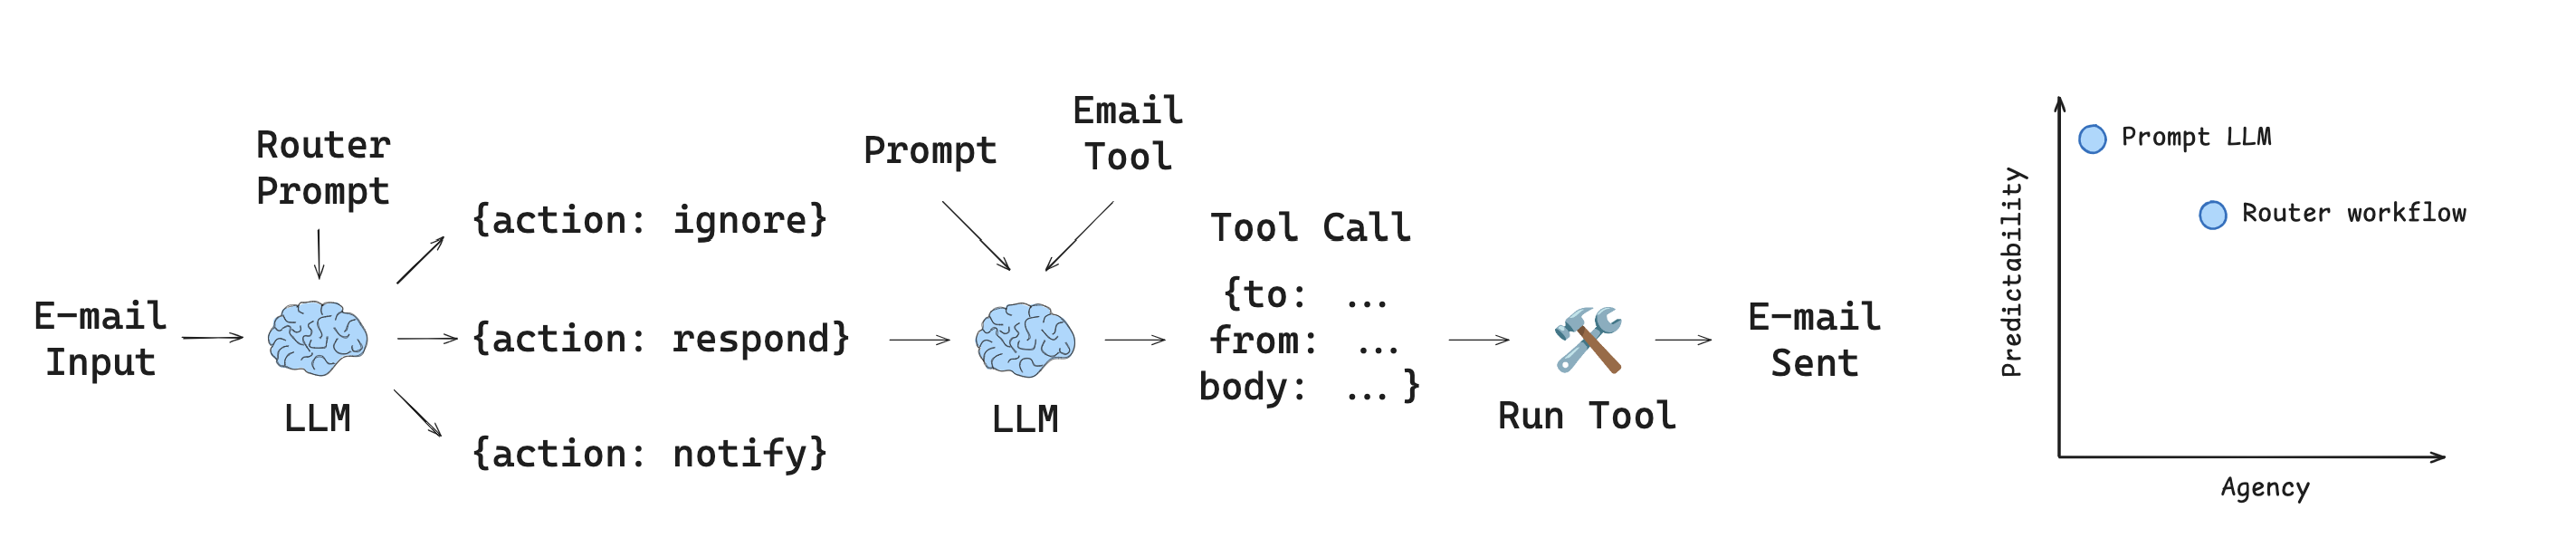

## Agents

We can further increase agency, allowing the LLM to dynamically direct its own tool usage. 

Agents are typically implemented as tool calling in a loop, where the output of each tool call is used to inform the next action.

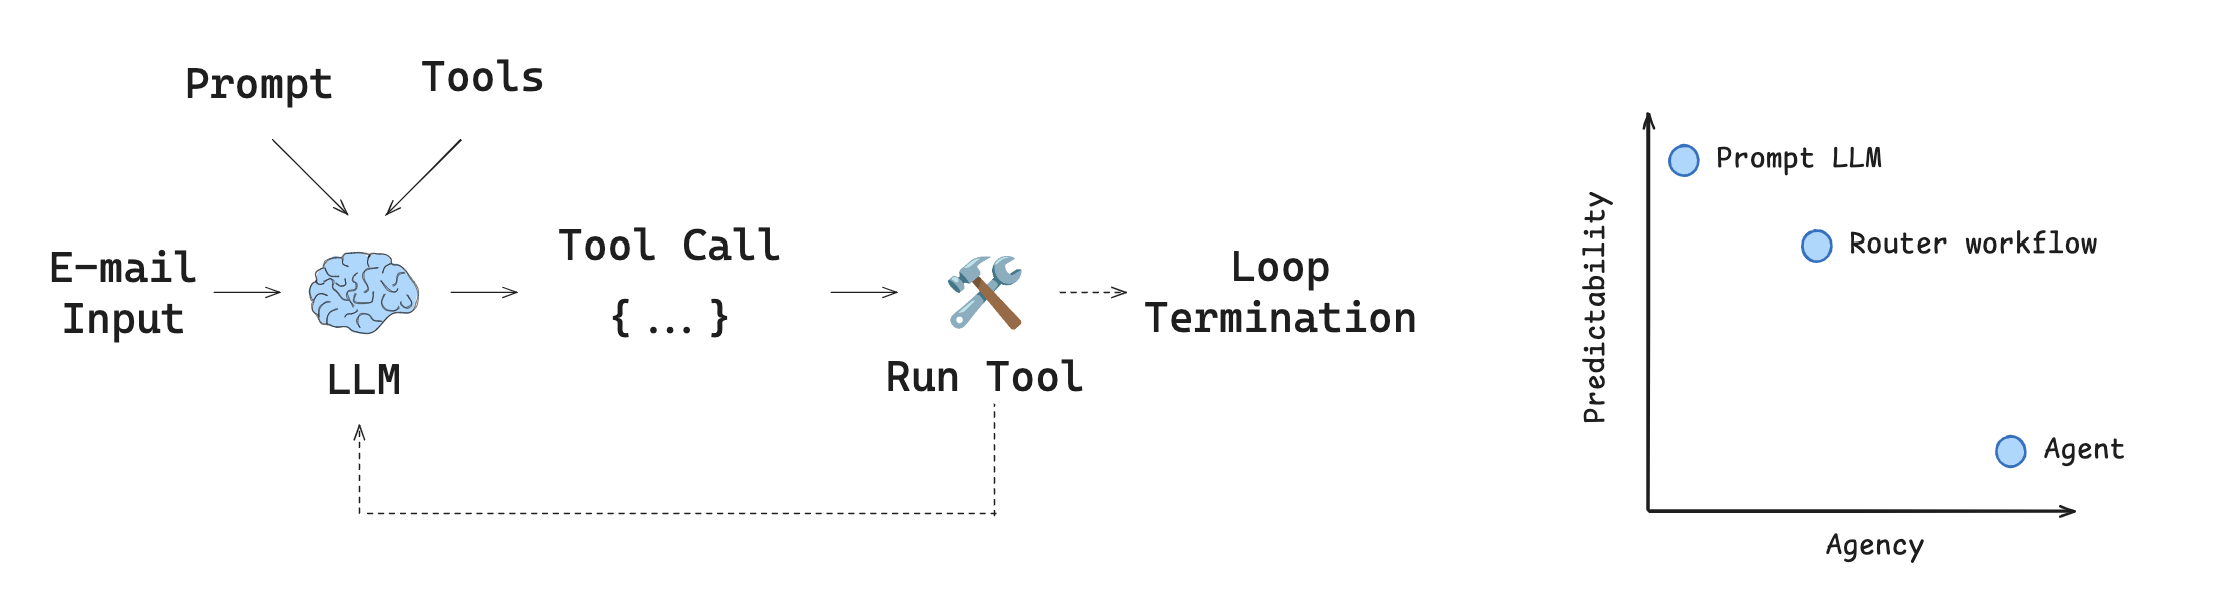

Agents are well suited to open-ended problems where it's difficult to predict the *exact* steps needed in advance.
 
Workflows are often appropriate when the control flow can easily be defined in advance. 

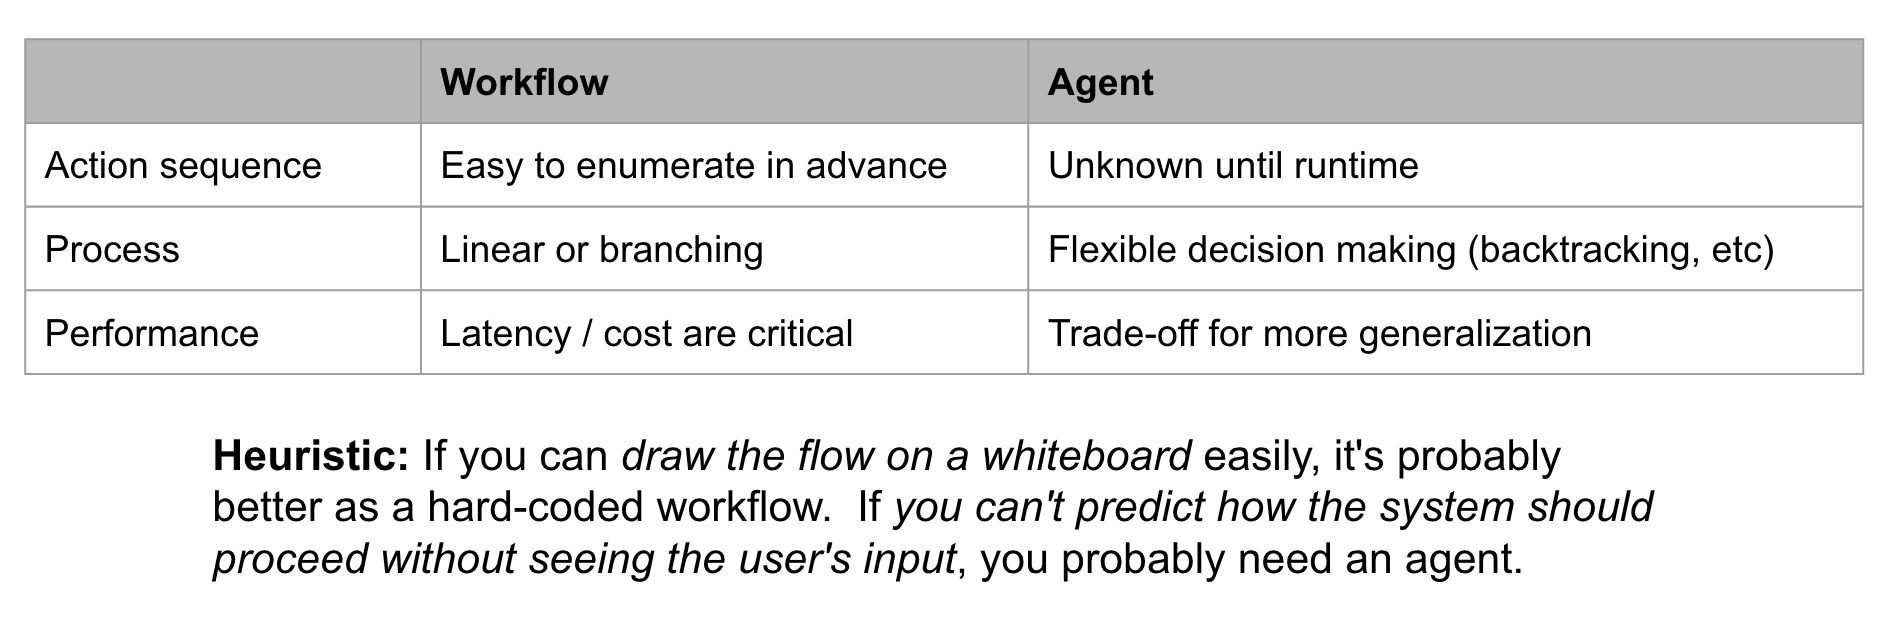

## What is LangGraph? 

[LangGraph](https://langchain-ai.github.io/langgraph/concepts/high_level/) provides low-level supporting infrastructure that sits underneath *any* workflow or agent. 

It does not abstract prompts or architecture, and provides a few benefits:

- **Control**: Make it easy to define and / or combine agents and workflows.
- **Persistence**: Provide a way to persist the state of a graph, which enables both memory and human-in-the-loop.
- **Testing, Debugging, and Deployment**: Provide an easy onramp for testing, debugging, and deploying applications.

### Control

LangGraph lets you define your application as a graph with:

1. *State*: What information do we need to track over the course of the application?
2. *Nodes*: How do we want to update this information over the course of the application?
3. *Edges*: How do we want to connect these nodes together?

We can use the [`StateGraph` class](https://langchain-ai.github.io/langgraph/concepts/low_level/#graphs) to initialize a LangGraph graph with a [`State` object](https://langchain-ai.github.io/langgraph/concepts/low_level/#state).

`State` defines the schema for information we want to track over the course of the application. 

This can be any object with `getattr()` in python, such as a dictionary, dataclass, or Pydantic object: 

- TypeDict is fastest but doesn’t support defaults
- Dataclass is basically as fast, supports dot syntax `state.foo`, and has defaults. 
- Pydantic is slower (especially with custom validators) but gives type validation.

In [42]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END 

class StateSchema(TypedDict):
    request: str
    email: str

workflow = StateGraph(StateSchema)

Each node is simply a python function or typescript code. This gives us full control over the logic inside each node.

They receive the current state, and return a dictionary to update the state.

By default, [state keys are overwritten](https://langchain-ai.github.io/langgraph/how-tos/state-reducers/). 

However, you can [define custom update logic](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers). 

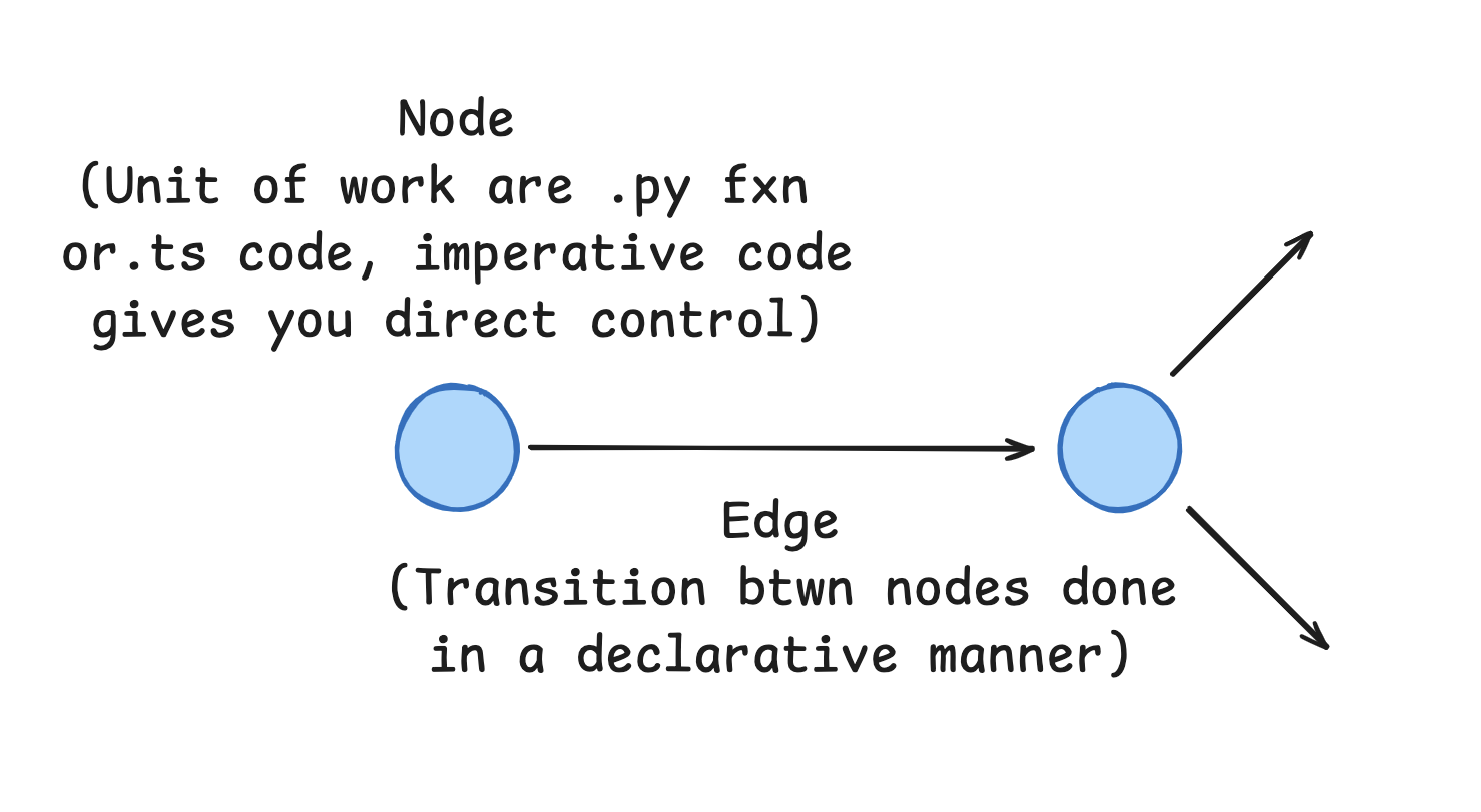

In [43]:
def write_email_node(state: StateSchema) -> StateSchema:
    # Imperative code that processes the request
    output = model_with_tools.invoke(state["request"])
    args = output.tool_calls[0]['args']
    email = write_email.invoke(args)
    return {
        "email": email
    }

In [45]:
workflow = StateGraph(StateSchema)
workflow.add_node("write_email_node", write_email_node)
workflow.add_edge(START, "write_email_node")
workflow.add_edge("write_email_node", END)

app = workflow.compile()

In [46]:
app.invoke({"request": "Draft a response to my boss (boss@company.ai) about tomorrow's meeting"})

{'request': "Draft a response to my boss (boss@company.ai) about tomorrow's meeting",
 'email': "Email sent to boss@company.ai with subject 'Tomorrow's Meeting Discussion' and content: Dear [Boss's Name],\n\nI'm looking forward to our meeting tomorrow. I've reviewed the agenda items and prepared notes for discussion. Please let me know if there are any additional topics you'd like to cover or materials I should bring.\n\nBest regards,\n[Your Name]"}

Routing between nodes can be done [conditionally](https://langchain-ai.github.io/langgraph/concepts/low_level/#conditional-edges) using a simple function. 

The return value of this function is used as the name of the node (or list of nodes) to send the state to next. 

You can optionally provide a dictionary that maps the `should_continue` output to the name of the next node.

In [51]:
from typing import Literal
from langgraph.graph import MessagesState
# from email_assistant.utils import show_graph

def call_llm(state: MessagesState) -> MessagesState:
    """Run LLM"""

    output = model_with_tools.invoke(state["messages"])
    return {"messages": [output]}

def run_tool(state: MessagesState):
    """Performs the tool call"""

    result = []
    for tool_call in state["messages"][-1].tool_calls:
        observation = write_email.invoke(tool_call["args"])
        result.append({"role": "tool", "content": observation, "tool_call_id": tool_call["id"]})
    return {"messages": result}

def should_continue(state: MessagesState) -> Literal["run_tool", "__end__"]:
    """Route to tool handler, or end if Done tool called"""

    # Get the last message
    messages = state["messages"]
    last_message = messages[-1]

    # If the last message is a tool call, check if it's a Done tool call
    if last_message.tool_calls:
        return "run_tool"
    # Otherwise, we stop (reply to the user)
    return END

workflow = StateGraph(MessagesState)
workflow.add_node("call_llm", call_llm)
workflow.add_node("run_tool", run_tool)
workflow.add_edge(START, "call_llm")
workflow.add_conditional_edges("call_llm", should_continue, {"run_tool": "run_tool", END: END})
workflow.add_edge("run_tool", END)

# Run the workflow 
app = workflow.compile()

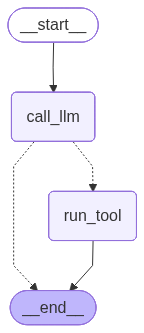

In [52]:
from IPython.display import Image

display(Image(app.get_graph().draw_mermaid_png()))

In [53]:
result = app.invoke({'messages': [{'role': 'user', 'content': 'Draft a response to my boss (boss@company.ai) confirming that I want to attend Interrupt'}]})
for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

Draft a response to my boss (boss@company.ai) confirming that I want to attend Interrupt
================================== Ai Message ==================================
Tool Calls:
  write_email (583rzz3cw)
 Call ID: 583rzz3cw
  Args:
    content: Dear [Boss's Name],

I wanted to confirm that I am excited to attend the Interrupt event and will be participating as planned. Looking forward to the opportunity to learn and connect with others at the event.

Best regards,
[Your Name]
    subject: Confirmation of Attendance at Interrupt
    to: boss@company.ai
================================= Tool Message =================================

Email sent to boss@company.ai with subject 'Confirmation of Attendance at Interrupt' and content: Dear [Boss's Name],

I wanted to confirm that I am excited to attend the Interrupt event and will be participating as planned. Looking forward to the opportunity to learn and c

In [54]:
result["messages"]

[HumanMessage(content='Draft a response to my boss (boss@company.ai) confirming that I want to attend Interrupt', additional_kwargs={}, response_metadata={}, id='3b906c7a-d24c-4983-adac-1a5416a2ff70'),
 AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user wants to draft a response to their boss confirming attendance at Interrupt. Let me start by understanding the key details. The function provided is write_email, which requires to, subject, and content.\n\nFirst, the recipient is the boss at boss@company.ai. The subject should be clear and confirm attendance. Maybe something like "Confirmation of Attendance at Interrupt". \n\nFor the content, it needs to be polite and concise. The user wants to confirm their attendance, so I\'ll mention that they\'re looking forward to attending and perhaps express enthusiasm. Including the event name again for clarity. \n\nI should check if there\'s any additional info needed, but since the user didn\'t specify more details, k

In [55]:
from langgraph.prebuilt import create_react_agent

agent = create_react_agent(
    model=llm, 
    tools=[write_email], 
    prompt="Respond to the user's request using the tools provided."
)

# Run the agent 
result = agent.invoke(
    {"messages": [{"role": 'user', 'content': 'Draft a response to my boss (boss@company.ai) confirming that I want to attend Interrupt!'}]}
)

for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

Draft a response to my boss (boss@company.ai) confirming that I want to attend Interrupt!
================================== Ai Message ==================================
Tool Calls:
  write_email (rxwhxf5gt)
 Call ID: rxwhxf5gt
  Args:
    content: Dear [Boss's Name],

I am writing to confirm my attendance at Interrupt! I am excited to participate and look forward to the insights and networking opportunities it will provide.

Best regards,
[Your Name]
    subject: Confirmation of Attendance at Interrupt!
    to: boss@company.ai
================================= Tool Message =================================
Name: write_email

Email sent to boss@company.ai with subject 'Confirmation of Attendance at Interrupt!' and content: Dear [Boss's Name],

I am writing to confirm my attendance at Interrupt! I am excited to participate and look forward to the insights and networking opportunities it will provide.

Bes

In [56]:
Markdown(result["messages"][-1].content)

Your email confirming attendance at Interrupt has been successfully sent to boss@company.ai with the subject       
"Confirmation of Attendance at Interrupt!". The message included a polite confirmation and excitement about the    
event's opportunities. Let me know if you'd like to make any changes or need further assistance!

### Persistence

#### Threads

It can be very useful to allow agents to pause during long running tasks.

LangGraph has a built-in persistence layer, implemented through checkpointers, to enable this. 

When you compile graph with a checkpointer, the checkpointer saves a [checkpoint](https://langchain-ai.github.io/langgraph/concepts/persistence/#checkpoints) of the graph state at every step. 

Checkpoints are saved to a thread, which can be accessed after graph execution completes.

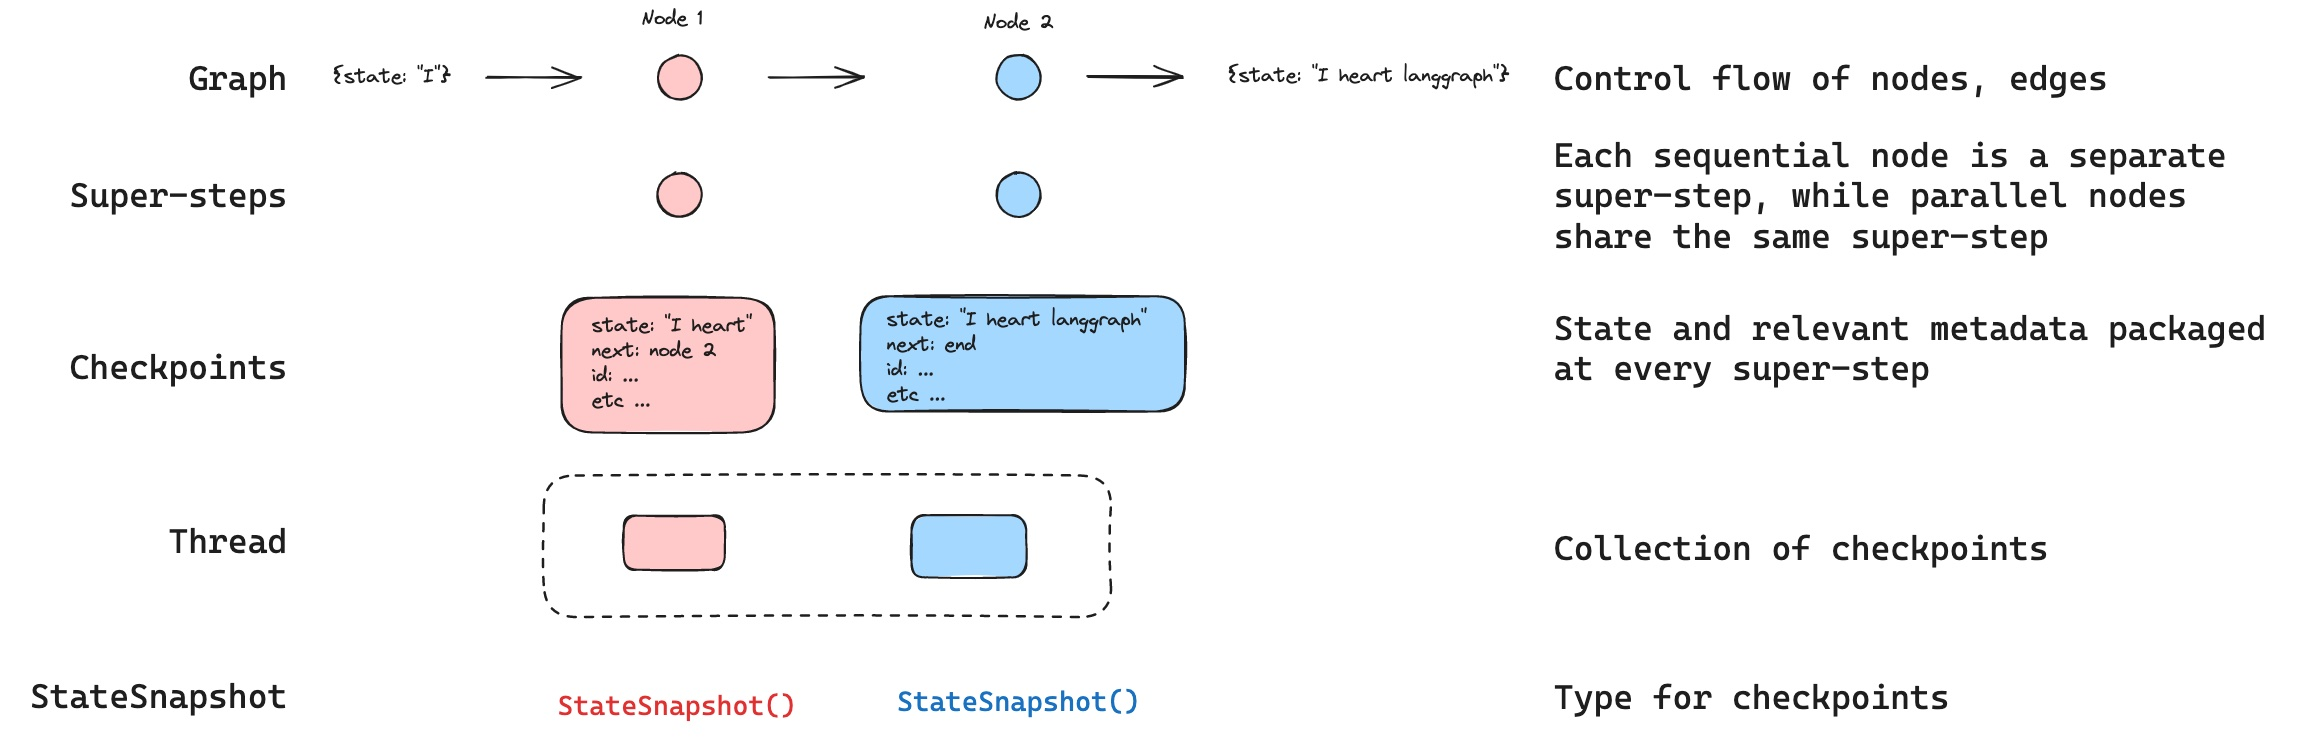

We compile the graph with a [checkpointer](https://langchain-ai.github.io/langgraph/concepts/persistence/#checkpointer-libraries).


In [57]:
from langgraph.checkpoint.memory import InMemorySaver

agent = create_react_agent(
    model=llm, 
    tools=[write_email],
    prompt="Respond to the user's request using the tools provided",
    checkpointer=InMemorySaver()
)

config = {'configurable': {'thread_id': "1"}}
result = agent.invoke({'messages': [{'role': 'user', 'content': 'What are some good practices for writing emails?'}]}, config=config)


In [58]:
# Get the latest state snapshot
config = {'configurable': {'thread_id': "1"}}
state = agent.get_state(config)
for message in state.values["messages"]:
    message.pretty_print()

================================ Human Message =================================

What are some good practices for writing emails?
================================== Ai Message ==================================

Here are some key practices for writing effective emails:

1. **Clear Subject Line**: Summarize the purpose concisely (e.g., "Project Update: Q3 Report Deadline").
2. **Friendly Greeting**: Use "Hi [Name]" or "Hello [Role/Team]" to set a polite tone.
3. **State Purpose Upfront**: Begin with your main request or topic to save time.
4. **Concise Structure**: Use short paragraphs, bullet points, or numbered lists for readability.
5. **Tone**: Match the audience (professional for work, casual for peers/friends).
6. **Call to Action**: Clearly state what you need (e.g., "Please review by Friday" or "Let me know your thoughts").
7. **Proofread**: Check for typos, grammar, and clarity before sending.
8. **Sign Off**: End with a professional closing (e.g., "Best regards," or "Thank yo

In [59]:
# Continue the conversation 
result = agent.invoke({'messages': [{'role': 'user', 'content': 'Good, lets use the 3rd practice to craft a response to my boss confirming that i want to attend Interrupt.'}]}, config=config)
for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

What are some good practices for writing emails?
================================== Ai Message ==================================

Here are some key practices for writing effective emails:

1. **Clear Subject Line**: Summarize the purpose concisely (e.g., "Project Update: Q3 Report Deadline").
2. **Friendly Greeting**: Use "Hi [Name]" or "Hello [Role/Team]" to set a polite tone.
3. **State Purpose Upfront**: Begin with your main request or topic to save time.
4. **Concise Structure**: Use short paragraphs, bullet points, or numbered lists for readability.
5. **Tone**: Match the audience (professional for work, casual for peers/friends).
6. **Call to Action**: Clearly state what you need (e.g., "Please review by Friday" or "Let me know your thoughts").
7. **Proofread**: Check for typos, grammar, and clarity before sending.
8. **Sign Off**: End with a professional closing (e.g., "Best regards," or "Thank yo

In [60]:

# Continue the conversation
result = agent.invoke({"messages": [{"role": "user", "content": "I like this, let's write the email to boss@company.ai"}]}, config)
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

What are some good practices for writing emails?
================================== Ai Message ==================================

Here are some key practices for writing effective emails:

1. **Clear Subject Line**: Summarize the purpose concisely (e.g., "Project Update: Q3 Report Deadline").
2. **Friendly Greeting**: Use "Hi [Name]" or "Hello [Role/Team]" to set a polite tone.
3. **State Purpose Upfront**: Begin with your main request or topic to save time.
4. **Concise Structure**: Use short paragraphs, bullet points, or numbered lists for readability.
5. **Tone**: Match the audience (professional for work, casual for peers/friends).
6. **Call to Action**: Clearly state what you need (e.g., "Please review by Friday" or "Let me know your thoughts").
7. **Proofread**: Check for typos, grammar, and clarity before sending.
8. **Sign Off**: End with a professional closing (e.g., "Best regards," or "Thank yo

#### Interrupts

In LangGraph, we can also use [interrupts](https://langchain-ai.github.io/langgraph/how-tos/human_in_the_loop/wait-user-input/) to stop graph execution at specific points.

Often this is used to collect input from a user and continue execution with collected input.

In [61]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

from langgraph.types import Command, interrupt
from langgraph.checkpoint.memory import InMemorySaver

class State(TypedDict):
    input: str
    user_feedback: str

def step_1(state):
    print("---Step 1---")
    pass

def human_feedback(state):
    print("---human_feedback---")
    feedback = interrupt("Please provide feedback:")
    return {"user_feedback": feedback}

def step_3(state):
    print("---Step 3---")
    pass

builder = StateGraph(State)
builder.add_node("step_1", step_1)
builder.add_node("human_feedback", human_feedback)
builder.add_node("step_3", step_3)
builder.add_edge(START, "step_1")
builder.add_edge("step_1", "human_feedback")
builder.add_edge("human_feedback", "step_3")
builder.add_edge("step_3", END)

# Set up memory
memory = InMemorySaver()

# Add
graph = builder.compile(checkpointer=memory)

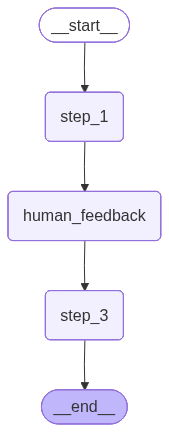

In [62]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [63]:
# Input 
initial_input = {'input': 'hello world'}

# Thread
thread = {'configurable': {'thread_id': "1"}}

# Run the graph until the first interruption
for event in graph.stream(initial_input, thread, stream_mode="updates"):
    print(event)
    print("\n")

---Step 1---
{'step_1': None}


---human_feedback---
{'__interrupt__': (Interrupt(value='Please provide feedback:', id='034c93dbfc40cf1d261e6d68f04ab97b'),)}




In [64]:
# Continue the graph execution 
for event in graph.stream(
    Command(resume="go to step 3!"),
    thread, 
    stream_mode="updates",
):
    print(event)
    print("\n")

---human_feedback---
{'human_feedback': {'user_feedback': 'go to step 3!'}}


---Step 3---
{'step_3': None}




### Deployment

We can also deploy our graph using [LangGraph Platform](https://langchain-ai.github.io/langgraph/concepts/langgraph_platform/). 

This creates a server [with an API](https://langchain-ai.github.io/langgraph/cloud/reference/api/api_ref.html) that we can use to interact with our graph and an interactive IDE, LangGraph [Studio](https://langchain-ai.github.io/langgraph/concepts/langgraph_studio/).

We simply need to ensure our project has [a structure](https://langchain-ai.github.io/langgraph/concepts/application_structure/) like this:

```
my-app/
├── src/email_assistant # all project code lies within here
│   └── langgraph101.py # code for constructing your graph
├── .env # environment variables
├── langgraph.json  # configuration file for LangGraph
└── pyproject.toml # dependencies for your project
```

The `langgraph.json` file specifies the dependencies, graphs, environment variables, and other settings required to start a LangGraph server.

To test this, let's deploy `langgraph_101.py`. We have it in our `langgraph.json` file in this repo:

```
 "langgraph101": "./src/email_assistant/langgraph_101.py:app",
```

For LangGraph Platform, there are a range of [deployment options](https://langchain-ai.github.io/langgraph/tutorials/deployment/): 
 
* Local deployments can be started with `langgraph dev` from the root directory of the repo. Checkpoints are saved to the local filesystem.
* There are also various [self-hosted options](https://langchain-ai.github.io/langgraph/tutorials/deployment/#other-deployment-options). 
* For hosted deployments, checkpoints are saved to Postgres using a postgres [checkpointer](https://langchain-ai.github.io/langgraph/concepts/persistence/#checkpointer-libraries). 

Test: 
```
Draft a response to my boss (boss@company.ai) confirming that I want to attent Interrupt!
```

Here we can see a visualization of the graph as well as the graph state in Studio.

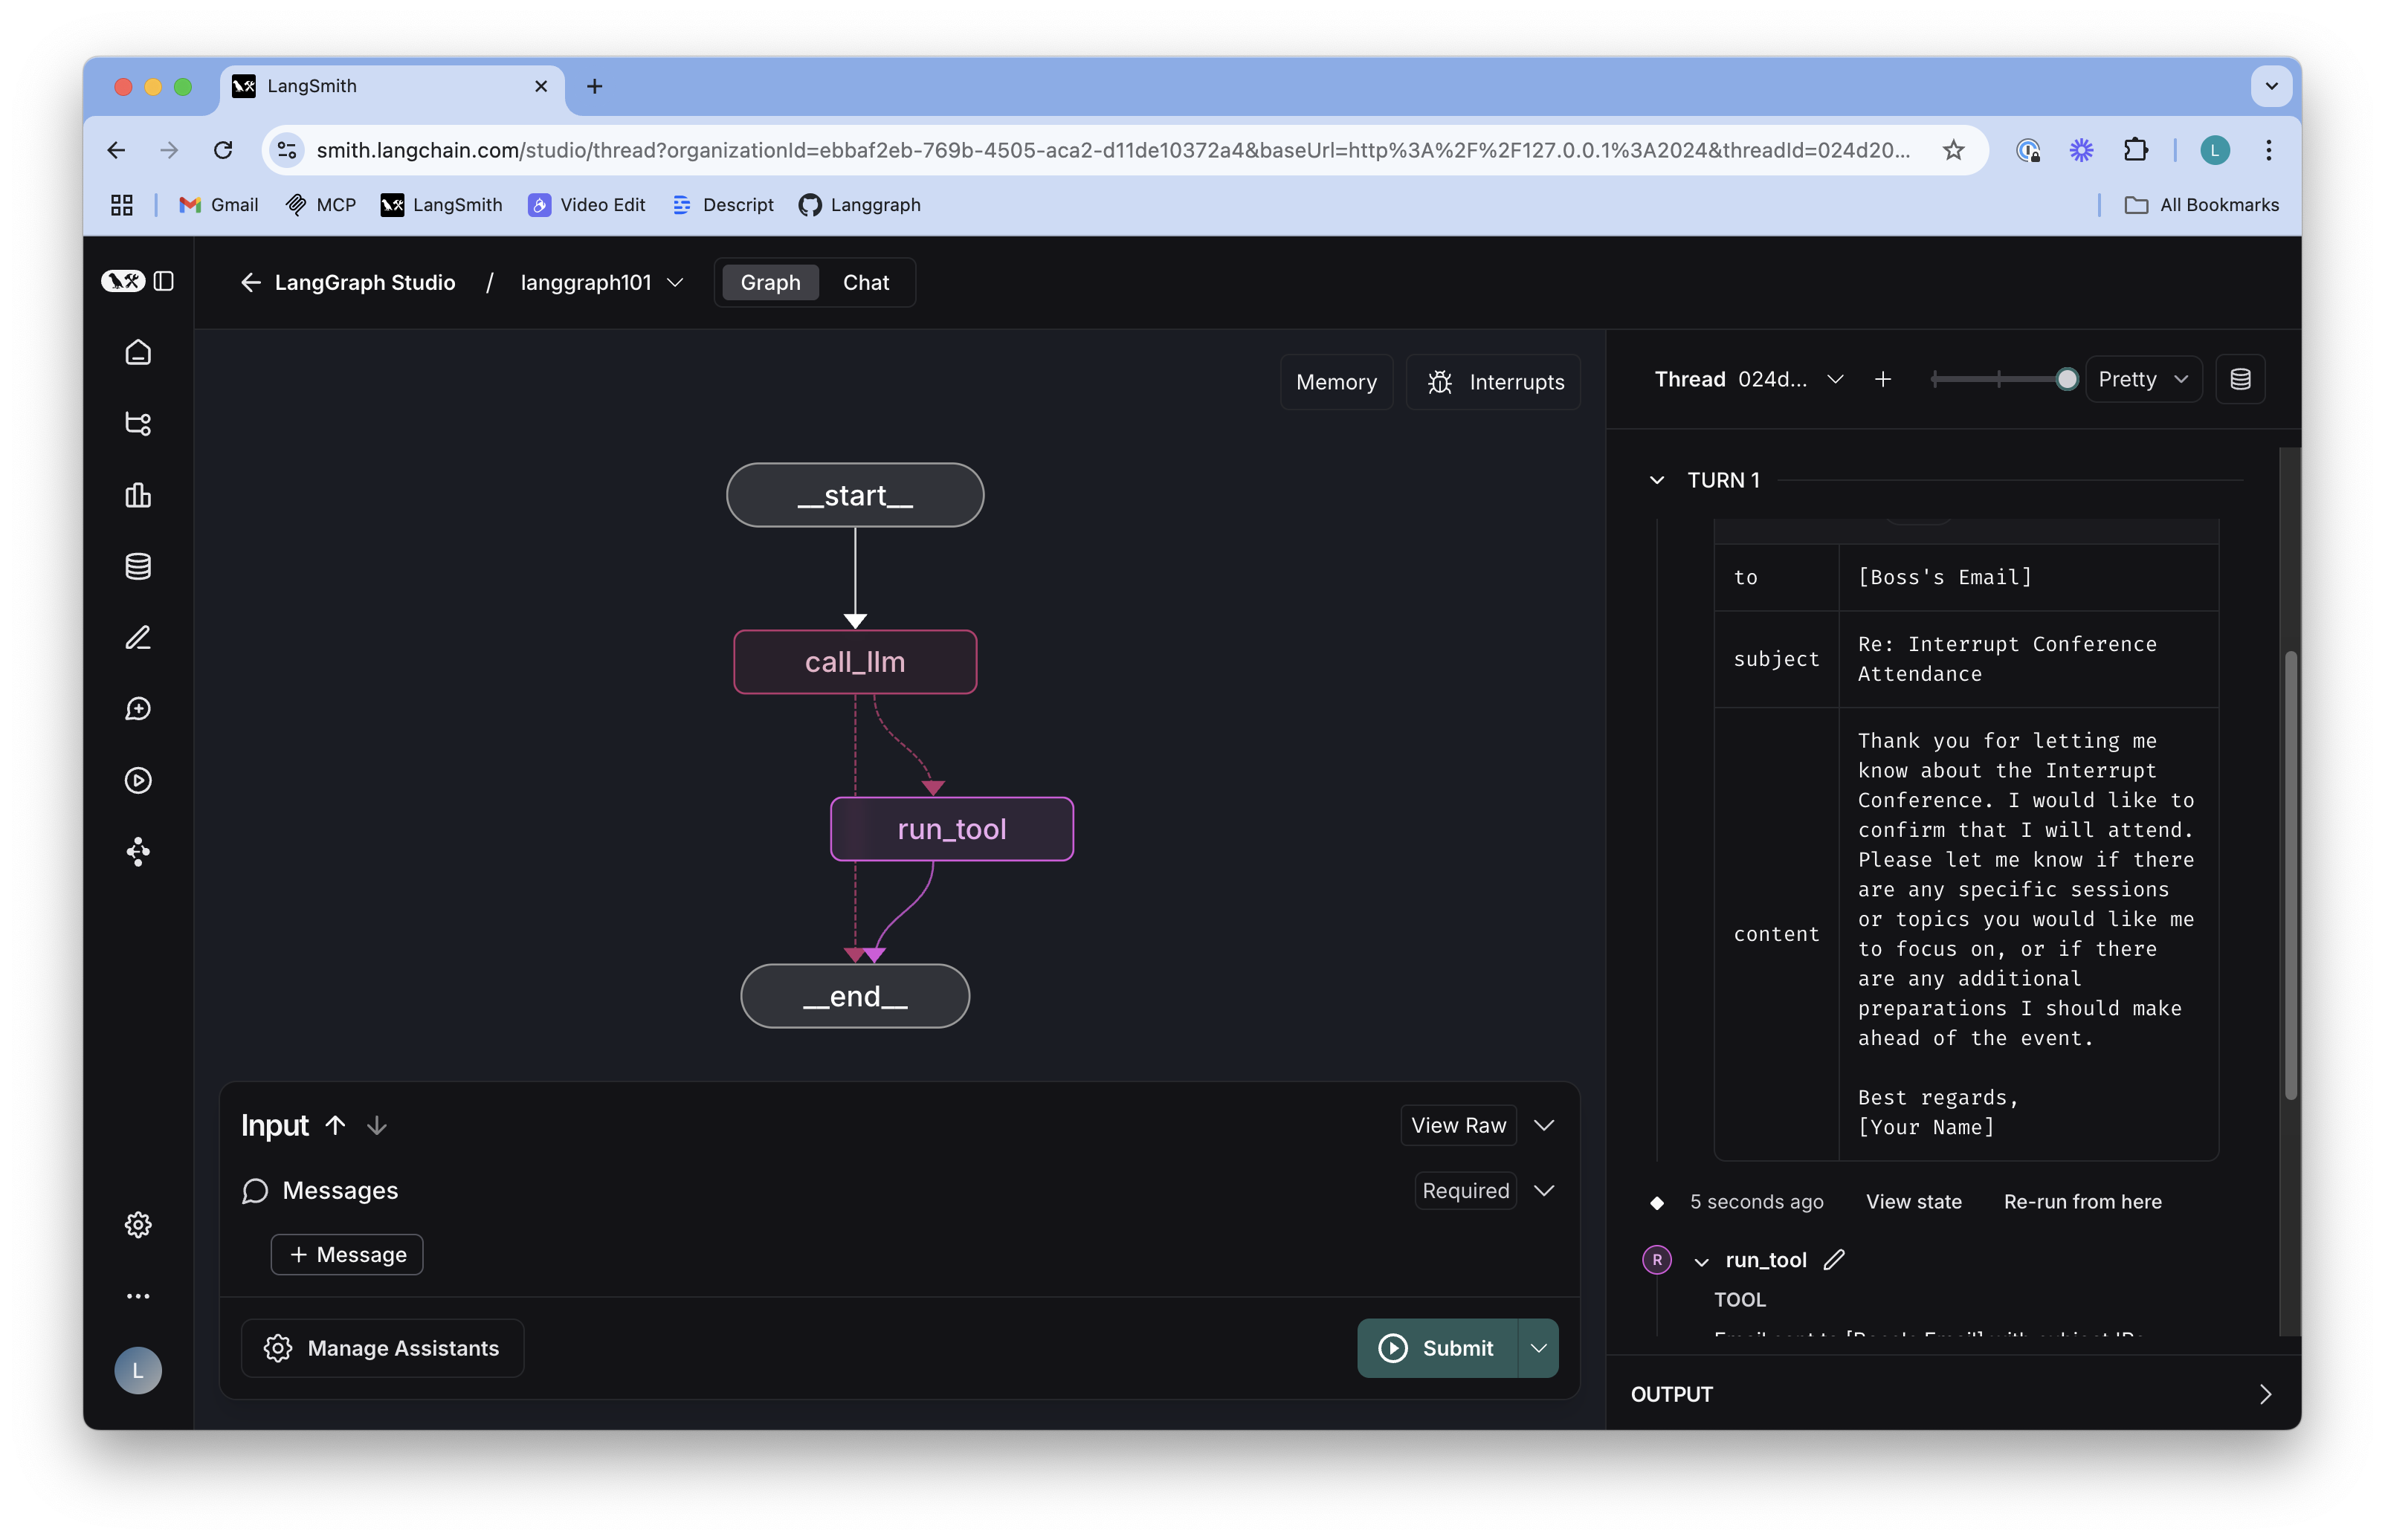

Also, you can see API docs for the local deployment here:

http://127.0.0.1:2024/docs